Pandas 拥有一些功能非常强大的日期、时间、带时间索引数据的处理工具
    
    时间戳：表示某个具体的时间点
        例如 2015 年 7 月 4 日上午 7 点
    时间间隔与周期：表示开始时间点与结束时间点之间的时间长度
        例如 2015 年（指的是 2015 年 1 月 1 日至 2015 年 12 月 31 日这段时间间隔）
      周期通常是指一种特殊形式的时间间隔，每个间隔长度相同，彼此之间不会重叠
        例如，以 24 小时为周期构成每一 天
    时间增量或持续时间：表示精确的时间长度
        例如，某程序运行持续时间 22.56 秒

# 1-Python 的日期与时间工具
    在 Python 标准库与第三方库中有许多可以表示日期、时间、时间增量和时间跨度的工具。

01-原生 Python 的日期与时间工具：datetime 与 dateutil
    
    Python 基本的日期与时间功能都在标准库的 datetime 模块中。
    如果和第三方库 dateutil 模块搭配使用，可以快速实现许多处理日期与时间的功能。

In [1]:
# 用 datetime 类型创建一个日期
from datetime import datetime
datetime(year=2015,month=7,day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
# 使用 dateutil 模块对各个字符串格式的日期进行正确解析
from dateutil import parser
date = parser.parse('4th of july, 2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
# 有了 datetime 对象之后，可以打印出这一天是星期几
date.strftime('%A')

'Saturday'

为了打印出是星期几，我们使用了一个标准字符串格式（standard string format）代码 "%A"

datetime 和 dateutil 模块在灵活性与易用性方面都表现出色，你可以用这些对象及其相应的方法轻松完成你感兴趣的任意操作。但如果你处理的时间数据量比较大，那么速度就会比较慢。

Python 的原生日期对象同样也没有 NumPy 中已经被编码的日期类型数组的性能好。

02-时间类型数组：NumPy 的 datetime64 类型
    
    datetime64 类型将日期编码为 64 位整数，这样可以让日期数组非常紧凑（节省内存）。

In [4]:
# datetime64 需要在设置日期时确定具体的输入类型
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [5]:
# 有了这个日期格式，就可以进行快速的向量化运算
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

因为 NumPy 的 datetime64 数组内元素的类型是统一的，所以这种数组的运算速度会比 Python 的 datetime 对象的运算速度快很多，尤其是在处理较大数组时。

datetime64 与 timedelta64 对象的一个共同特点是，它们都是在基本时间单位的基础上建立的。由于 datetime64 对象是 64 位精度，所以可编码的时间范围可以是基本单元的 2^64 倍。也就是说，datetime64 在时间精度与最大时间跨度之间达成了一 种平衡。

想要一个时间纳秒（nanosecond，ns）级的时间精度，那么就可以将时间编码到 0~2^64 纳秒或 600 年之内，NumPy 会自动判断输入时间需要使用的时间单位.

In [6]:
# 一个以天为单位的日期
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [7]:
# 以分钟为单位的日期
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

时区将自动设置为执行代码的操作系统的当地时区。

In [8]:
# 设置时间单位，将时间单位设置为纳秒
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

# 日期与时间单位格式代码
    代码  含义                 时间跨度 (相对)     时间跨度 (绝对) 
    Y     年（year）           ± 9.2e18 年       [9.2e18 BC, 9.2e18 AD] 
    M     月（month）          ± 7.6e17 年       [7.6e17 BC, 7.6e17 AD] 
    W     周（week）           ± 1.7e17 年       [1.7e17 BC, 1.7e17 AD] 
    D     日（day）            ± 2.5e16 年       [2.5e16 BC, 2.5e16 AD] 
    h     时（hour）           ± 1.0e15 年       [1.0e15 BC, 1.0e15 AD] 
    m     分（minute）         ± 1.7e13 年       [1.7e13 BC, 1.7e13 AD] 
    s     秒（second）         ± 2.9e12 年       [ 2.9e9 BC, 2.9e9 AD]
    ms    毫秒（millisecond）  ± 2.9e9 年        [ 2.9e6 BC, 2.9e6 AD] 
    us    微秒（microsecond）  ± 2.9e6 年        [290301 BC, 294241 AD] 
    ns    纳秒（nanosecond）   ± 292 年          [ 1678 AD, 2262 AD] 
    ps    皮秒（picosecond）   ± 106 天          [ 1969 AD, 1970 AD] 
    fs    飞秒（femtosecond）  ± 2.6 小时        [ 1969 AD, 1970 AD] 
    as    原秒（attosecond）   ± 9.2 秒          [ 1969 AD, 1970 AD]

日常工作中的时间数据类型，默认单位都用纳秒 datetime64[ns]，因为用它来表示时间范围精度可以满足绝大部分需求。

虽然 datetime64 弥补了 Python 原生的 datetime 类型的不足，但它缺少了许多datetime（尤其是 dateutil）原本具备的便捷方法与函数。

03-Pandas的日期与时间工具：理想与现实的最佳解决方案
    
    Pandas 所有关于日期与时间的处理方法全部都是通过 Timestamp 对象实现的，
    利用 numpy.datetime64 的有效存储和向量化接口将 datetime 和 dateutil 的易用性有机结合起来。
    Pandas 通过一组 Timestamp 对象就可以创建一个可以作为 Series 或 DataFrame 索引的 DatetimeIndex

用 Pandas 的方式演示前面介绍的日期与时间功能.

In [9]:
# 获取某一天是星期几
import pandas as pd
date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [10]:
date.strftime('%A')

'Saturday'

In [11]:
# 直接进行 NumPy 类型的向量化运算
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

# 2- Pandas 时间序列：用时间作索引

    Pandas 时间序列工具非常适合用来处理带时间戳的索引数据.

In [12]:
# 通过一个时间索引数据创建一个 Series 对象
index = pd.DatetimeIndex(['2014-07-04','2014-08-04',
                         '2015-07-04','2015-08-04'])
data = pd.Series([0,1,2,3],index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [13]:
# 可以直接用日期进行切片取值
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [14]:
# 还有一些仅在此类 Series 上可用的取值操作
# 例如直接通过年份切片获取该年的数据
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

# 3 Pandas时间序列数据结构
    针对时间戳数据，Pandas 提供了 Timestamp 类型。
        与前面介绍的一样，它本质上是 Python 的原生 datetime 类型的替代品，
        但是在性能更好的 numpy.datetime64 类型的基础上创建。
        对应的索引数据结构是 DatetimeIndex。 
    针对时间周期数据，Pandas 提供了 Period 类型。
        这是利用 numpy.datetime64 类型将固定频率的时间间隔进行编码。
        对应的索引数据结构是 PeriodIndex。 
    针对时间增量或持续时间，Pandas 提供了 Timedelta 类型。
        Timedelta 是一种代替 Python 原生 datetime.timedelta 类型的高性能数据结构
        同样是基于 numpy.timedelta64 类型。
        对应的索引数据结构是 TimedeltaIndex.

最基础的日期 / 时间对象是 Timestamp 和 DatetimeIndex。

这两种对象可以直接使用，最常用的方法是 pd.to_datetime() 函数，它可以解析许多日期与时间格式。

对 pd.to_datetime() 传递一个日期会返回一个 Timestamp 类型，传递一个时间序列会返回一个 DatetimeIndex 类型

In [15]:
dates = pd.to_datetime([datetime(2015,7,3),'4th of July, 2015','2015-Jul-6',
                        '07-07-2015','20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

任何 DatetimeIndex 类型都可以通过 to_period() 方法和一个频率代 码转换成 PeriodIndex 类型.

In [16]:
# 用 'D' 将数据转换成单日的时间序 列
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [17]:
# 当用一个日期减去另一个日期时，返回的结果是 TimedeltaIndex 类型
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

有规律的时间序列：pd.date_range()
    
    为了能更简便地创建有规律的时间序列，Pandas 提供了一些方法：
    pd.date_range() 可以处理时间戳、
    pd.period_range() 可以处 理周期、
    pd.timedelta_range() 可以处理时间间隔。

pd.date_range() 与 np.arange() 类似，通过开始日期、结束日期和频率代码（同样是可选的）创建一个有规律的日 期序列，默认的频率是天.

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

日期范围不一定非是开始时间与结束时间，也可以是开始时间与周期数 periods

In [19]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

可以通过 freq 参数改变时间间隔，默认值是 D

In [20]:
# 可以创建一 个按小时变化的时间戳
pd.date_range('2015-07-03',periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

创建一个有规律的周期或时间间隔序列，有类似的函数 pd.period_range() 和 pd.timedelta_range()

In [21]:
# 以月为周期的示例
pd.period_range('2015-07',periods=8,freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [22]:
# 以小时递增的序列
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

# 4-时间频率与偏移量

    Pandas 时间序列工具的基础是时间频率或偏移量（offset）代码。
    就像之前见过的D（day）和 H（hour）代码，
    可以用这些代码设置任意需要的时间间隔。

Pandas 频率代码

    代码   描述（含双休日） 代码  描述（仅含工作日）
    D      天              B      天 
    W      周
    M      月末            BM     月末
    Q      季末            BQ     季末
    A      年末            BA     年末
    H      小时            BH     小时
    T      分钟
    S      秒
    L      毫秒
    U      微秒
    N      纳秒

月、季、年频率都是具体周期的结束时间（月末、季末、年末），有一些以 S（start，开始）为后缀的代码表示日期开始

带开始索引的频率代码

    代码     频率 
    MS       月初（month start）
    BMS      月初（business month start，仅含工作日）
    QS       季初（quarter start）
    BQS      季初（business quarter start，仅含工作日）
    AS       年初（year start）
    BAS      年初（business year start，仅含工作日）

可以在频率代码后面加三位月份缩写字母来改变季、年频率的开始时间

    Q-JAN、BQ-FEB、QS-MAR、BQS-APR 等。
    A-JAN、BA-FEB、AS-MAR、BAS-APR 等。
也可以在后面加三位星期缩写字母来改变一周的开始时间
    
    W-SUN、W-MON、W-TUE、W-WED 等。

可以将频率组合起来创建的新的周期

In [23]:
# 可以用小时（H）和分钟（T）的组合来实现 2 小时 30 分钟
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [24]:
# 创建 一个工作日偏移序列
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

# 5-重新取样、迁移和窗口

In [25]:
# 导入历史股票价格
# （需要通过 conda install pandas-datareader 安装 pandas-datareader 程序包）
from pandas_datareader import data
yahoo = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [26]:
# 简化数据，只用收盘价
yahoo = yahoo['Close']

In [27]:
# 可视化
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

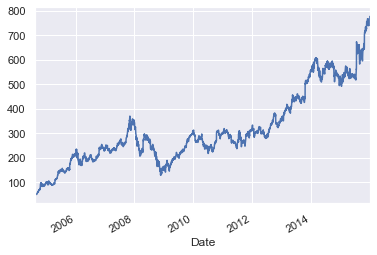

In [28]:
# 收盘价随时间变化的趋势
yahoo.plot();

01-重新取样与频率转换
    
    处理时间序列数据时，经常需要按照新的频率（更高频率、更低频率）对数据进行重新取样。
    通过 resample() 方法解决这个问题，或者用更简单的 asfreq() 方法。
    这两个方法的主要差异在于，resample() 方法是以数据累计（data aggregation）为基础， 而 asfreq() 方法是以数据选择（data selection）为基础。

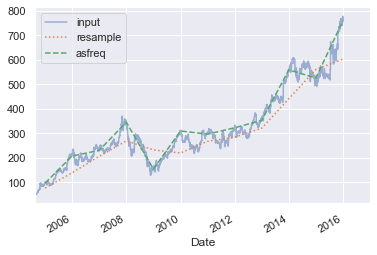

In [29]:
# 用两种方法对数据进行向后取样（down-sample）
# 用年末（'BA'，最后一个工作日）对数据进行重新取样
yahoo.plot(alpha=0.5, style='-')
yahoo.resample('BA').mean().plot(style=':')
yahoo.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

注意这两种取样方法的差异：
    
    在每个数据点上，resample 反映的是上一年的均值，
    而 asfreq 反映的是上一年最后一个工作日的收盘价。

在进行向前取样（up-sampling）时，resample() 与 asfreq() 的用法大体相同，不过重新取样有许多种配置方式。操作时，两种方法都默认将向前取样作为缺失值处理，也就是说在里面填充 NaN。与前面介绍过的 pd.fillna() 函数类似，asfreq() 有一个 method 参数可以设置填充缺失值的方式。

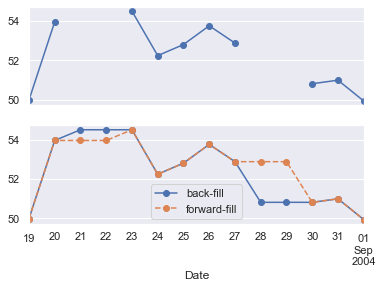

In [30]:
# 将对工作日数据按 天进行重新取样（即包含周末）
fig, ax = plt.subplots(2, sharex=True)
data = yahoo.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

上面那幅图是原始数据：非工作日的股价是缺失值，所以不会出现在图上。

而下面那幅图通过向前填充与向后填充这两种方法填补了缺失值

02--时间迁移
    
    另一种常用的时间序列操作是对数据按时间进行迁移。
    Pandas 有两种解决这类问题的方法：shift() 和 tshift()。
    shift() 就是迁移数据，而 tshift() 就是迁移索引。
    两种方法都是按照频率代码进行迁移。

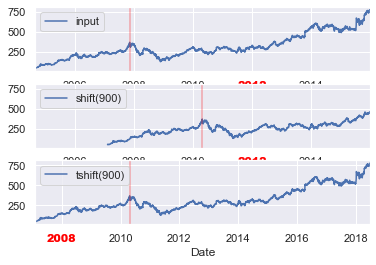

In [31]:
# 用 shift() 和 tshift() 这两种方法让数据迁移 900 天
fig, ax = plt.subplots(3, sharey=True)
# 对数据应用时间频率，用向后填充解决缺失值
yahoo = yahoo.asfreq('D', method='pad')
yahoo.plot(ax=ax[0])
yahoo.shift(900).plot(ax=ax[1])
yahoo.tshift(900).plot(ax=ax[2]) 

# 设置图例与标签 
local_max = pd.to_datetime('2007-11-05') 
offset = pd.Timedelta(900, 'D') 

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red') 
ax[0].axvline(local_max, alpha=0.3, color='red') 

ax[1].legend(['shift(900)'], loc=2) 
ax[1].get_xticklabels()[4].set(weight='heavy', color='red') 
ax[1].axvline(local_max + offset, alpha=0.3, color='red') 

ax[2].legend(['tshift(900)'], loc=2) 
ax[2].get_xticklabels()[1].set(weight='heavy', color='red') 
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

shift(900)将数据向前推进了 900 天，这样图形中的一段就消失了（最左侧就变成了缺失值）

而 tshift(900)方法是将时间索引值向前推进了 900 天。

这类迁移方法的常见使用场景就是计算数据在不同时段的差异。

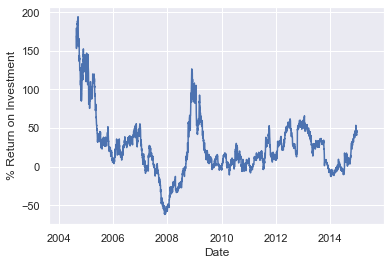

In [32]:
# 用迁移后的值来计算股票一年期的投资回报率
ROI = 100 * (yahoo.tshift(-365) / yahoo - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

03--移动时间窗口

    Pandas 处理时间序列数据的第 3 种操作是移动统计值（rolling statistics）。这些指标可以通过 Series 和 DataFrame 的 rolling() 属性来实现，它会返回与 groupby 操作类似的结果作成为可能。    

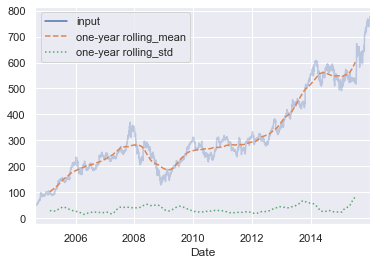

In [33]:
# 获取 Google 股票收盘价的一年期移动平均值和标准差
rolling = yahoo.rolling(365, center=True) 
data = pd.DataFrame({'input': yahoo, 
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':']) 
ax.lines[0].set_alpha(0.3)

# 案例：美国西雅图自行车统计数据的可视化

In [34]:
data = pd.read_csv('../Data/FremontBridge.csv', 
                   index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [35]:
# 为了方便后面的计算，缩短数据集的列名
data.columns = ['Total','East','West']
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [36]:
# 三列的统计值
data.dropna().describe()

,Total,East,West
count,63494.000000,63494.000000,63494.000000
mean,114.315888,52.445648,61.870240
std,145.595300,67.396191,90.635793
min,0.000000,0.000000,0.000000
25%,15.000000,6.000000,7.000000
50%,61.000000,29.000000,30.000000
75%,149.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


01--数据可视化

In [37]:
%matplotlib inline 
import seaborn; seaborn.set()

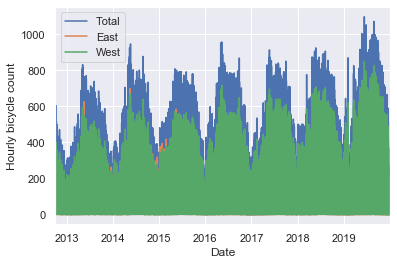

In [38]:
data.plot()
plt.ylabel('Hourly bicycle count');

在图中显示的样本数据对我们来说实在太多了，因此可以通过重新取样将数据转换成更大的颗粒度，比如按周累计.

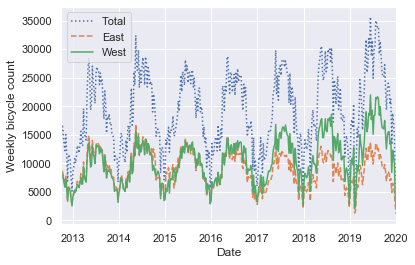

In [39]:
weekly = data.resample('W').sum() 
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

另一种对数据进行累计的简便方法是用 pd.rolling_mean() 函数求移动平均值.

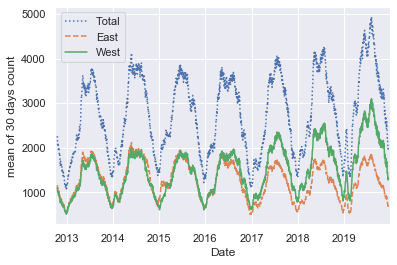

In [40]:
# 计算数据的 30 日移动均值，并让图形在 窗口居中显示（center=True）
daily = data.resample('D').sum() 
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-']) 
plt.ylabel('mean of 30 days count');

由于窗口太小，现在的图形还不太平滑。我们可以用另一个移动均 值的方法获得更平滑的图形，例如高斯分布时间窗口。

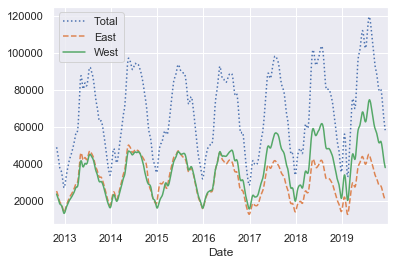

In [41]:
# 将设置窗口的宽度（选择 50 天）和窗 口内高斯平滑的宽度（选择 10 天）
daily.rolling(50, center=True, 
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

02--深入挖掘数据
    
    虽然我们已经从图 3-14 的平滑数据图观察到了数据的总体趋势， 但是它们还隐藏了一些有趣的特征。例如，我们可能希望观察单日 内的小时均值流量，这可以通过 GroupBy操作来解决。

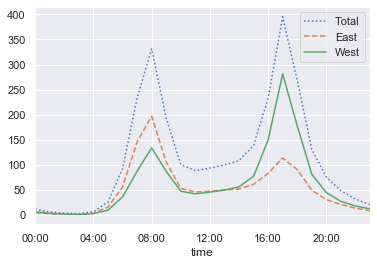

In [42]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

我们可能还会对周内每天的变化产生兴趣，这时依然可以通过一个 简单的 groupby 来实现

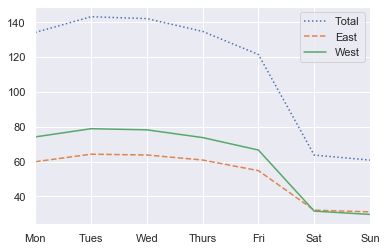

In [43]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'] 
by_weekday.plot(style=[':', '--', '-']);

用一个复合 groupby 来观察一周内工 作日与双休日每小时的数据

In [44]:
# 用一个标签表示双休日和工作日的不同小时
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

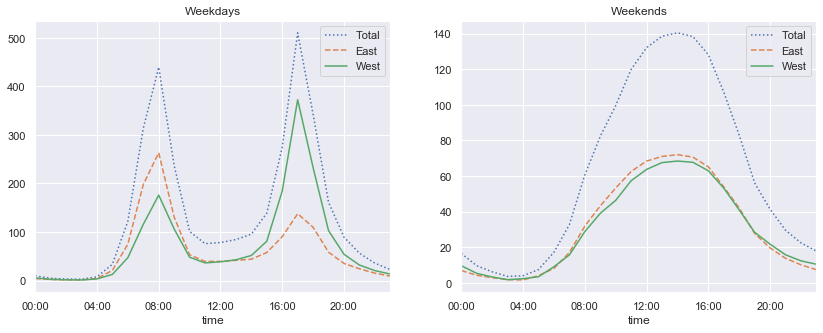

In [45]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 2, figsize=(14, 5)) 
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', 
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', 
                           xticks=hourly_ticks, style=[':', '--', '-']);